In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from collections import Counter

In [7]:
df = pd.read_csv("./data/Food_Establishment_Inspection.csv")

C:\Users\hyhsi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
pd.set_option('display.max_columns', 40)

In [9]:
df.shape

(274970, 22)

In [11]:
df.head(-10)

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,Inspection Business Name,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,"@ THE SHACK, LLC",SHACK COFFEE,08/03/2019,Seating 0-12 - Risk Category III,2920 SW AVALON WAY,Seattle,98126,(206) 938-5665,-122.370913,47.570425,"@ THE SHACK, LLC",Routine Inspection/Field Review,5.0,Satisfactory,False,BLUE,4100 - Warewashing facilities properly install...,5,PR0048053,DAAWCFJXT,IVAW6QGCN,1.0
1,"@ THE SHACK, LLC",SHACK COFFEE,10/03/2018,Seating 0-12 - Risk Category III,2920 SW AVALON WAY,Seattle,98126,(206) 938-5665,-122.370913,47.570425,"@ THE SHACK, LLC",Routine Inspection/Field Review,10.0,Satisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, pr...",5,PR0048053,DA1RU2P4A,IVM00AWOV,1.0
2,"@ THE SHACK, LLC",SHACK COFFEE,10/03/2018,Seating 0-12 - Risk Category III,2920 SW AVALON WAY,Seattle,98126,(206) 938-5665,-122.370913,47.570425,"@ THE SHACK, LLC",Routine Inspection/Field Review,10.0,Satisfactory,False,BLUE,4100 - Warewashing facilities properly install...,5,PR0048053,DA1RU2P4A,IVTPKYPPP,1.0
3,"@ THE SHACK, LLC",SHACK COFFEE,04/02/2018,Seating 0-12 - Risk Category III,2920 SW AVALON WAY,Seattle,98126,(206) 938-5665,-122.370913,47.570425,"@ THE SHACK, LLC",Consultation/Education - Field,0.0,Complete,False,NaN,NaN,0,PR0048053,DA34JMIOR,NaN,1.0
4,"@ THE SHACK, LLC",SHACK COFFEE,07/27/2017,Seating 0-12 - Risk Category III,2920 SW AVALON WAY,Seattle,98126,(206) 938-5665,-122.370913,47.570425,"@ THE SHACK, LLC",Routine Inspection/Field Review,0.0,Satisfactory,False,NaN,NaN,0,PR0048053,DADNXR5VS,NaN,1.0
5,"@ THE SHACK, LLC",SHACK COFFEE,06/16/2017,Seating 0-12 - Risk Category III,2920 SW AVALON WAY,Seattle,98126,(206) 938-5665,-122.370913,47.570425,"@ THE SHACK, LLC",Routine Inspection/Field Review,0.0,Satisfactory,False,NaN,NaN,0,PR0048053,DABZPHHC2,NaN,1.0
6,100 LB CLAM,100 LB CLAM,09/12/2019,Seating 0-12 - Risk Category III,1001 FAIRVIEW AVE N Unit 1700A,SEATTLE,98109,(206) 369-2978,-122.331727,47.629021,100 LB CLAM,Routine Inspection/Field Review,0.0,Incomplete,False,NaN,NaN,0,PR0085848,DAISVPYB0,NaN,2.0
7,100 LB CLAM,100 LB CLAM,07/24/2017,Seating 0-12 - Risk Category III,1001 FAIRVIEW AVE N Unit 1700A,SEATTLE,98109,(206) 369-2978,-122.331727,47.629021,100 LB CLAM,Routine Inspection/Field Review,25.0,Unsatisfactory,False,BLUE,3300 - Potential food contamination prevented ...,5,PR0085848,DAYYFZ1IJ,IV7PVOPQG,2.0
8,100 LB CLAM,100 LB CLAM,07/24/2017,Seating 0-12 - Risk Category III,1001 FAIRVIEW AVE N Unit 1700A,SEATTLE,98109,(206) 369-2978,-122.331727,47.629021,100 LB CLAM,Routine Inspection/Field Review,25.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0085848,DAYYFZ1IJ,IVYAWAZOU,2.0
9,100 LB CLAM,100 LB CLAM,07/24/2017,Seating 0-12 - Risk Category III,1001 FAIRVIEW AVE N Unit 1700A,SEATTLE,98109,(206) 369-2978,-122.331727,47.629021,100 LB CLAM,Routine Inspection/Field Review,25.0,Unsatisfactory,False,RED,0600 - Adequate handwashing facilities,10,PR0085848,DAYYFZ1IJ,IVMPY7TUR,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274970 entries, 0 to 274969
Data columns (total 22 columns):
Name                          274970 non-null object
Program Identifier            274970 non-null object
Inspection Date               274423 non-null object
Description                   274970 non-null object
Address                       274970 non-null object
City                          274970 non-null object
Zip Code                      274970 non-null object
Phone                         192911 non-null object
Longitude                     274959 non-null float64
Latitude                      274959 non-null float64
Inspection Business Name      274423 non-null object
Inspection Type               274423 non-null object
Inspection Score              274369 non-null float64
Inspection Result             274423 non-null object
Inspection Closed Business    274423 non-null object
Violation Type                156246 non-null object
Violation Description         156246 n

In [13]:
print("Unique restaurants:", df["Business_ID"].nunique())

Unique restaurants: 12403


In [14]:
df['Violation Type'].value_counts().head(10)

RED     83101
BLUE    73145
Name: Violation Type, dtype: int64

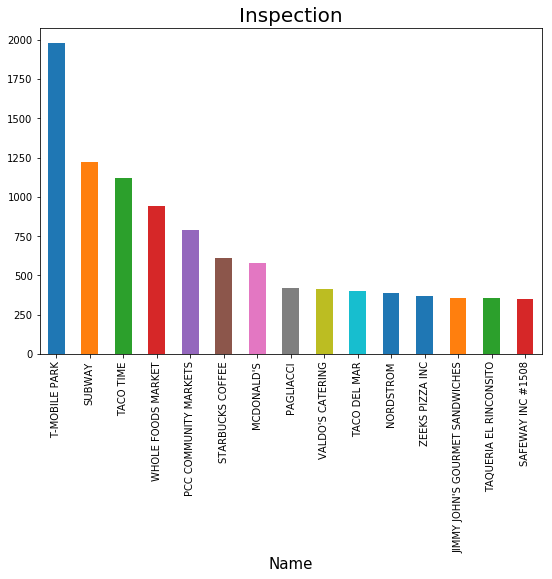

In [11]:
df['Inspection Business Name'].value_counts().head(15).plot(kind='bar', figsize=(9,6))
plt.title('Inspection', fontsize=20)
plt.xlabel("Name", fontsize=15)
plt.show()

In [20]:
df['City'].value_counts().head(10)

<map object at 0x123d15588>    274970
Name: City, dtype: int64

In [24]:
# Capitalize all the city names 
df['City'] = df['City'].str.upper()

In [25]:
df['City'].value_counts().head(10)

SEATTLE        136455
BELLEVUE        19689
KENT            13705
RENTON          11805
FEDERAL WAY     11695
REDMOND         11159
KIRKLAND        10654
AUBURN           7752
ISSAQUAH         5846
SHORELINE        5185
Name: City, dtype: int64

## Data Cleaning 

To Do List: 
- Clean the NaN
- Clean irrelevant columns

In [15]:
# droped unnecessary columns 
df = df.drop(
    columns=[
        "Longitude",
        "Latitude",
        "Inspection Business Name",
        "Business_ID", 
        "Inspection_Serial_Num",
        "Violation_Record_ID",
        "Phone",
        "City",
        "Address",
        "Program Identifier"
    ]
)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274970 entries, 0 to 274969
Data columns (total 12 columns):
Name                          274970 non-null object
Inspection Date               274423 non-null object
Description                   274970 non-null object
Zip Code                      274970 non-null object
Inspection Type               274423 non-null object
Inspection Score              274369 non-null float64
Inspection Result             274423 non-null object
Inspection Closed Business    274423 non-null object
Violation Type                156246 non-null object
Violation Description         156246 non-null object
Violation Points              274970 non-null int64
Grade                         215640 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 25.2+ MB


In [17]:
df.head(5)

,Name,Inspection Date,Description,Zip Code,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Grade
0,"@ THE SHACK, LLC",08/03/2019,Seating 0-12 - Risk Category III,98126,Routine Inspection/Field Review,5.0,Satisfactory,False,BLUE,4100 - Warewashing facilities properly install...,5,1.0
1,"@ THE SHACK, LLC",10/03/2018,Seating 0-12 - Risk Category III,98126,Routine Inspection/Field Review,10.0,Satisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, pr...",5,1.0
2,"@ THE SHACK, LLC",10/03/2018,Seating 0-12 - Risk Category III,98126,Routine Inspection/Field Review,10.0,Satisfactory,False,BLUE,4100 - Warewashing facilities properly install...,5,1.0
3,"@ THE SHACK, LLC",04/02/2018,Seating 0-12 - Risk Category III,98126,Consultation/Education - Field,0.0,Complete,False,NaN,NaN,0,1.0
4,"@ THE SHACK, LLC",07/27/2017,Seating 0-12 - Risk Category III,98126,Routine Inspection/Field Review,0.0,Satisfactory,False,NaN,NaN,0,1.0


## Exploration 

To Do List: 
- Fast food chain: 
    - mean/median inspection score; 
    - compare with regional score; 
    - trend (time series) 
- By Zip Code:
    - average score
    - 

In [30]:
mcd = df[df['Name'].str.contains('Mc donald\'s', case = False)]
sbw = df[df['Name'].str.contains('subway', case = False)]
wds = df[df['Name'].str.contains('windy', case = False)]
sbux = df[df['Name'].str.contains('starbucks', case = False)]

In [41]:
mcd_score_mean_by_zip = df.groupby('Zip Code')['Inspection Score'].mean()

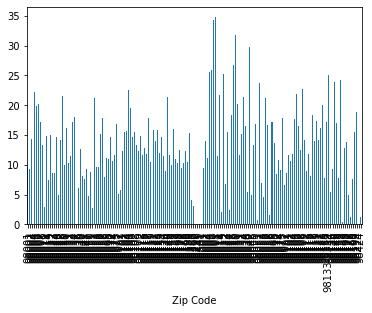

In [46]:
mcd_score_mean_by_zip.plot(kind = 'bar')

In [23]:
score_mean_by_zip = df.groupby('Zip Code')['Inspection Score'].mean()

In [24]:
score_median_by_zip = df.groupby('Zip Code')['Inspection Score'].median()

In [25]:
score_mean_by_zip

Zip Code
98001          9.700392
98002          9.284125
98003         14.304117
98004         22.217874
98005         19.794721
98006         20.192447
98007         17.143450
98008         13.364017
98010          2.949495
98011         14.813807
98014          7.397749
98019         14.998755
98022          8.590666
98023          8.553277
98024         14.692513
98026          5.000000
98027         14.128461
98028         21.587883
98029          9.904288
98030         16.158529
98031         10.219952
98032         11.493671
98033         17.165535
98034         17.972746
98037          0.000000
98038          6.090498
98039         12.721854
98040          8.121424
98042          7.573828
98045          9.238788
                ...    
98108         22.758333
98109         14.212662
98112          8.894340
98115         11.781942
98116          8.121849
98117         18.323370
98118         13.915825
98119         17.400000
98121         14.111399
98122         16.226496
98125  